# Real-Space Charge Density Analysis

This notebook analyzes and visualizes the real-space charge density of a system using atomic units.  
It includes:
- Setup of cell and grid parameters,
- Calculation of expected charge and atomic densities,
- Helper plots for inspecting charge distribution.

Use this notebook to validate and explore the charge density output from electronic structure simulations.


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import re
import imageio
import cv2
from matplotlib.ticker import ScalarFormatter
from matplotlib import colors

# Set the default font size for all text elements


plt.rcdefaults()
%matplotlib inline
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
mpl.rcParams['font.size'] = 14

In [2]:
# all units are in atomic units (bohr, electron charge, etc...)

#celldm = 2**0.5*11.42/2
celldm = 24.88
num_atoms = 30
num_PP_elec = 18
rho_fft_grid = 181
bin_width = celldm/(rho_fft_grid -1)
expected_charge_density = np.round((num_PP_elec*num_atoms)/celldm**3, 3)
expected_charge_density_in_plane_avg = np.round(((num_PP_elec*num_atoms)/rho_fft_grid)/celldm**2, 3)
# wrong definition is the cell is not cubic...!
V_elem_bohr = bin_width**3

In [3]:
atomic_density = np.round(num_atoms/celldm**3, 4)
atomic_density

0.0019

In [4]:
expected_charge_density

0.035

In [5]:
# we have quite thin planes :D
expected_charge_density_in_plane_avg

0.005

In [6]:
V_elem_bohr

0.002640788455418381

In [7]:
# reading function which works for 3D datagrids from xcrysden...!

def read_file(file_path, rho_fft_grid):
    with open(file_path, 'r') as file:
        
        begin_line = "BEGIN_BLOCK_DATAGRID_3D"
        end_line = "END_DATAGRID_3D"
        matrix_lines = []
        counter_increase = False
        counter = 0
        lines_to_skip = 7

        for line in file:
            if line.strip() == begin_line:
                counter_increase = True
                continue
            
            if counter_increase:
                counter += 1

            if line.strip() == end_line:
                break

            if counter > lines_to_skip:
                matrix_lines.extend(line.split())

        matrix = np.array([float(value) for value in matrix_lines])
        matrix = np.reshape(matrix, [rho_fft_grid, rho_fft_grid, rho_fft_grid])
    
    return matrix

In [8]:
charge_density_1 = read_file("/home/marlinone/FunWithPy/virtual_environment-1.0/data/xsf/liquid-charge-30atoms.xsf", 
                           rho_fft_grid=rho_fft_grid)

In [9]:
charge_density_2 = read_file("/home/marlinone/FunWithPy/virtual_environment-1.0/data/xsf/31.xsf", 
                           rho_fft_grid=rho_fft_grid)

In [10]:
charge_density_1.shape

(181, 181, 181)

In [11]:
# charge_density[0][0][0]*V_elem_bohr + charge_density[0][0][1]*V_elem_bohr + ...

In [12]:
# total charge
V_elem_bohr*(np.sum(charge_density_1))

556.6979505426665

In [14]:
def plot_charge_density_avg(charge_density):
    
    
    # edge = np.arange(0, celldm+bin_width, bin_width)
    # X, Y = np.meshgrid(edge, edge)
    #plt.contourf(X, Y, np.average(np.abs(charge_density), axis=2), cmap='viridis')
    
    # norm = colors.Normalize(vmin=0, vmax=np.max(np.abs(charge_density)))
    norm = colors.Normalize(vmin=0, vmax=np.max(np.abs(charge_density)))
    #norm = colors.Normalize(vmin=0, vmax=0.25)
    norm = colors.Normalize(vmin=0, vmax=0.1*10**-3)


    plt.imshow(np.average(np.abs(charge_density), axis=2), cmap='viridis', norm=norm)

    # plt.imshow(np.average(np.abs(charge_density), axis=2), extent=[0, 24.88, 0, 24.88], cmap='viridis', norm=norm)

    
    # cbar = plt.colorbar(label=r'charge density [$\Delta e/a.u.^3$]', format='%.5f')
    cbar = plt.colorbar(label=r'charge density [e/a.u.$^3$]', format='%.5f')

    
    cbar.formatter = ScalarFormatter(useMathText=True)
    cbar.formatter.set_powerlimits((-3, -3))  
    #cbar.formatter.set_powerlimits((-2, 2))

    cbar.update_ticks()
    
    #Define custom tick positions and labels
    # x_ticks = np.linspace(0, 180, 5)  # E.g., 5 tick positions (from 0 to 179)
    # x_labels = np.linspace(0, 24.88, 5)  # Custom labels corresponding to the range -10 to 10
    x_ticks = np.array([0, 36, 73, 109, 145])
    x_labels = np.array([0, 5, 10, 15, 20])

    # y_ticks = np.linspace(0, 180, 5)  # E.g., 5 tick positions (from 0 to 179)
    # y_labels = np.linspace(0, 24.88, 5)  # Custom labels corresponding to the range -5 to 5
    
    y_ticks = np.array([0, 36, 73, 109, 145])
    y_ticks = np.array([180, 144, 107, 71, 35])

    y_labels = np.array([0, 5, 10, 15, 20], dtype=np.int32)


    # Set the ticks and labels on both axes
    plt.xticks(x_ticks, [f'{x}' for x in x_labels])
    plt.yticks(y_ticks, [f'{y}' for y in y_labels])


    # plt.xlabel(r'$\vec{a}_1$ [a.u.]')
    # plt.ylabel(r'$\vec{a}_2$ [a.u.]')
    plt.xlabel('Lattice parameter [a.u.]')
    plt.ylabel('Lattice parameter [a.u.]')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig('../Images/charge-density/subtraction-bg-transp.png',
            bbox_inches='tight', transparent=True, dpi=300)
    plt.show()

In [15]:
np.max(np.abs(charge_density_1))

1.18034

In [16]:
np.max(np.abs(charge_density_2))

0.000869046

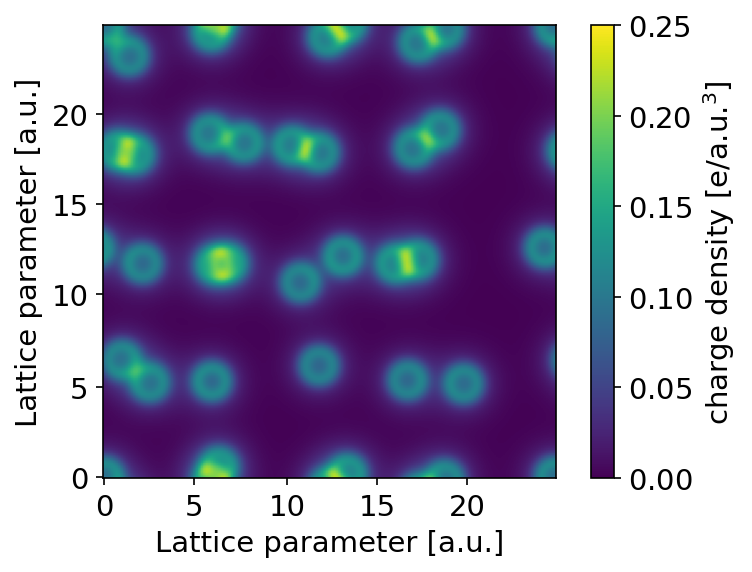

In [9]:
plot_charge_density_avg(charge_density_1)

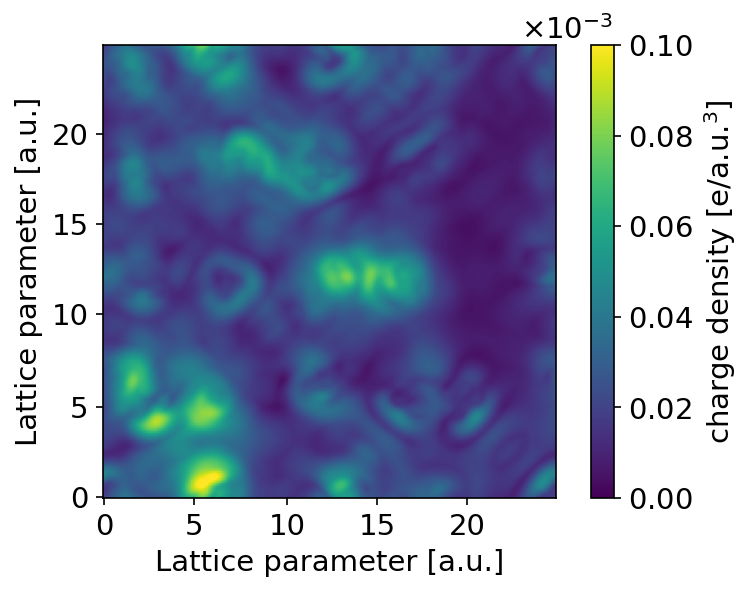

In [13]:
plot_charge_density_avg(charge_density_2)

In [17]:
def gif_charge_density(charge_density):
    edge = np.arange(0, celldm+bin_width, bin_width)
    X, Y = np.meshgrid(edge, edge)
    
    # Define colorbar tick locations and labels
    ticks = np.linspace(charge_density.min(), charge_density.max(), 6)
    tick_labels = ['{:.2f}'.format(t) for t in ticks]
    
    for j in range(0, rho_fft_grid):
    
        plt.contourf(X, Y, charge_density[j], cmap='viridis'
                )
#         plt.contourf(X, Y, charge_density[j], cmap='viridis'
#                 )
#         cbar = plt.colorbar(label=r'charge density [$e/a.u.^3$]', format='%.5f')
    
#         cbar.formatter = ScalarFormatter(useMathText=True)
#         cbar.formatter.set_powerlimits((-2, 2))  # Adjust the power limits if needed
#         cbar.update_ticks()
        
        cbar = plt.colorbar(label=r'charge density [$e/a.u.^3$]', format='%.5f')
        
        cbar.set_ticklabels(tick_labels)  # Set tick labels
        cbar.formatter = ScalarFormatter(useMathText=True)
        cbar.formatter.set_powerlimits((-2, 2))
        cbar.update_ticks()
        
        #plt.colorbar(label=r'charge density [$e/a.u.^3$]', format='%.5f')
        #plt.text(11, -2, 'z={}'.format(j))
        plt.gca().set_aspect('equal', adjustable='box')
        plt.xlabel(r'$\vec{a}_1$ [a.u.]')
        plt.ylabel(r'$\vec{a}_2$ [a.u.]')
        #plt.title('Animation of rho along the supercell height')
        #plt.title('Animation of the charge density along the supercell', fontsize=12)
        plt.savefig('../Images/charge-density/gif_pics/z-plane-liquidmaxatoms-{}.png'.format(j), bbox_inches='tight', transparent=True, dpi=300)
        plt.close()

In [18]:
gif_charge_density(charge_density_1)

In [20]:
gif_pictures = glob.glob('../Images/charge-density/gif_pics/*.png')
gif_pictures = sorted(gif_pictures, 
                      key=lambda string: int(re.search(r"\d+", string).group()))

In [21]:
with imageio.get_writer('../charge-density-liquidmaxatoms.gif', mode='I', fps=9) as writer:
    for filename in gif_pictures:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread('../Images/charge-density/gif_pics/z-plane-liquidmaxatoms-{}.png'.format("180"))
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)
    writer.append_data(image)

/tmp/ipykernel_16575/2807127845.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
/tmp/ipykernel_16575/2807127845.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('../Images/charge-density/gif_pics/z-plane-liquidmaxatoms-{}.png'.format("180"))


In [22]:
# Convert images to video
image_folder = '../Images/charge-density/gif_pics/'  # Folder where images are saved
video_name = '../charge-density-subtraction.mp4'

#images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images = glob.glob(image_folder + '*.png')
images = sorted(images, key=lambda string: int(re.search(r"\d+", string).group()))
frame = cv2.imread(images[0])
height, width, layers = frame.shape
frame_rate = 10
video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), frame_rate, (width,height))  # Adjust frame rate as needed
#video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), 1, (width,height)) 
for image in images:
    #print(image)
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()